In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

In [42]:
flow = 35
#high = data.highpass(15)
high = data.bandpass(flow, 600) # fhigh must be > max simulated freq of GW ~ 560 Hz
#psd = high.whiten(4,2).psd(4, 2) # whitening destroys SNR peak because matched filtering normalizes by PSD!
psd = high.psd(4, 2)
off = 0
zoom = high.crop(1126259460+off, 1126259464+off)

In [13]:
psd.xspan

Segment(0.0, 2048.25)

In [43]:
from pycbc.waveform import get_fd_waveform
hp, _ = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
                        f_lower=flow, f_final=2048, delta_f=psd.df.value) #20

In [44]:
from pycbc.filter import matched_filter
snr = matched_filter(hp, zoom.to_pycbc(), psd=psd.to_pycbc(),
                     low_frequency_cutoff=flow) #15
snrts = TimeSeries.from_pycbc(snr).abs()

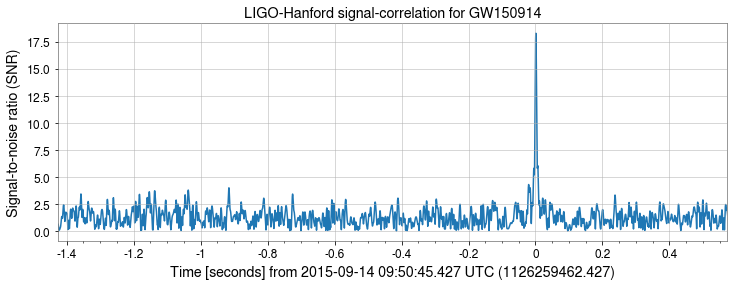

In [45]:
plot = snrts.plot()
ax = plot.gca()
ax.set_xlim(1126259461, 1126259463)
ax.set_epoch(1126259462.427)
ax.set_ylabel('Signal-to-noise ratio (SNR)')
ax.set_title('LIGO-Hanford signal-correlation for GW150914')
plot.show()

In [ ]:
plot = hp.to_timeseries().plot()
#ax = plot.gca()
#ax.set_xlim(1126259461, 1126259463)
#ax.set_epoch(1126259462.427)
#ax.set_ylabel('Signal-to-noise ratio (SNR)')
#ax.set_title('LIGO-Hanford signal-correlation for GW150914')
#plot.show()